### Урок 7. Многомерный статистический анализ. Линейная регрессия

##### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

b = (np.mean(X*y) - np.mean(X)*np.mean(y)) / (np.mean(X**2)-np.mean(X)**2)
b

2.620538882402765

In [33]:
a = np.mean(y) - b*np.mean(X)
a

444.1773573243596

In [34]:
y_hat = 444.18 + 2.62*X
y_hat

array([535.88, 562.08, 941.98, 968.18, 548.98, 627.58, 585.66, 837.18,
       758.58, 732.38])

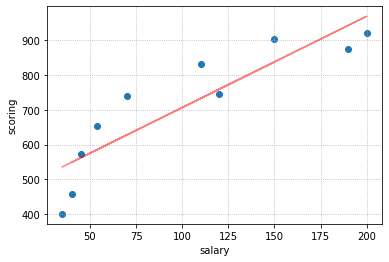

In [35]:
plt.scatter(X, y)
plt.plot(X, y_hat, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring')
plt.grid(linestyle='dotted')

plt.show()

матричный расчет без использования intercept

In [36]:
X = X.reshape((len(X), 1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [37]:
y = y.reshape((len(y), 1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [41]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
B

array([[5.88982042]])

матричный расчет с использованем intercept

In [42]:
X = np.hstack([np.ones((len(X), 1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [43]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
B

array([[444.17735732],
       [  2.62053888]])

##### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept)

In [55]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

def mse_(B1, y = y, X = X, n = 10):
    return np.sum((B1*X) - y)**2 /n

alpha = 1e-6
n = 10
B1 = 0.1

for i in range (1500):
    B1 -= alpha * (2/n) * np.sum((B1 * X - y) *  X)
    if i % 100 == 0:
        print('Iteration: {i}, B1 = {B1}, mse = {mse}'.format(i = i, B1 = B1, mse = mse_(B1)))

Iteration: 0, B1 = 0.25952808, mse = 4672868.836557692
Iteration: 100, B1 = 5.54537842245223, mse = 217853.54976661596
Iteration: 200, B1 = 5.868748638669329, mse = 131810.8077273557
Iteration: 300, B1 = 5.888531320728348, mse = 127244.99680579857
Iteration: 400, B1 = 5.8897415574471985, mse = 126968.28841071585
Iteration: 500, B1 = 5.889815595583751, mse = 126951.37011565862
Iteration: 600, B1 = 5.889820124983314, mse = 126950.33514891358
Iteration: 700, B1 = 5.889820402076462, mse = 126950.2718333306
Iteration: 800, B1 = 5.88982041902807, mse = 126950.26795990097
Iteration: 900, B1 = 5.889820420065112, mse = 126950.26772293777
Iteration: 1000, B1 = 5.8898204201285544, mse = 126950.26770844117
Iteration: 1100, B1 = 5.889820420132437, mse = 126950.26770755407
Iteration: 1200, B1 = 5.889820420132673, mse = 126950.26770750014
Iteration: 1300, B1 = 5.889820420132673, mse = 126950.26770750014
Iteration: 1400, B1 = 5.889820420132673, mse = 126950.26770750014


In [54]:
mse_(5.88982042)

126950.26773781571

##### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Таблица критических точек распределения Стьюдента применается когда неизвесто матеатическое ожидание и дисперсия генеральной совокупности, но мы знаем что величины распередены нормально.

Таблица значений функции Лапласа применяется для случаев когда мы знаем среднее и дисперсию генеральной совокупности и величины распеределены нормально

##### 4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации)

In [64]:
B0 = 1

for i in range (1000000):
    B1_old = B1
    B0_old = B0
    B1 -= alpha * (2/n) * np.sum((B1_old * X + B0_old - y) *  X)
    B0 -= alpha * (2/n) * np.sum((B1_old * X + B0_old - y))
    if i % 20000 == 0:
        print('Iteration: {i}, B0 = {B0}, B1 = {B1}'.format(i = i, B0 = B0, B1 = B1))

Iteration: 0, B0 = 1.0443177357321112, B1 = 7.1143572856596755
Iteration: 20000, B0 = 177.35536677074003, B1 = 4.584466701655933
Iteration: 40000, B0 = 283.52014759581084, B1 = 3.8030469766375323
Iteration: 60000, B0 = 347.4434300187104, B1 = 3.332543355898366
Iteration: 80000, B0 = 385.9325222012687, B1 = 3.0492466204295723
Iteration: 100000, B0 = 409.1073367741085, B1 = 2.878669738999376
Iteration: 120000, B0 = 423.06121305515654, B1 = 2.77596304020777
Iteration: 140000, B0 = 431.463034897347, B1 = 2.71412191679043
Iteration: 160000, B0 = 436.5218879963818, B1 = 2.6768865213340987
Iteration: 180000, B0 = 439.56789339358045, B1 = 2.6544665748943705
Iteration: 200000, B0 = 441.40193535884856, B1 = 2.6409672151534656
Iteration: 220000, B0 = 442.50623738453606, B1 = 2.632839064004434
Iteration: 240000, B0 = 443.171152902838, B1 = 2.6279449918136932
Iteration: 260000, B0 = 443.5715077298699, B1 = 2.624998203279702
Iteration: 280000, B0 = 443.81256690673297, B1 = 2.623223901159605
Iteratio

In [60]:
print (a, b)

444.1773573243596 2.620538882402765
